In [1]:
from bs4 import BeautifulSoup
import urllib.request
from urllib.parse import urljoin
import pandas as pd

In [2]:
import requests
base_url = 'https://www.storyum.kr/story/contents/creation/list.do?menuNo=500010&cateSe=&genreSe=&sdate=&edate=&sortSe=ldate&sortSe2=up&pageUnit=10&listTp=&genreCodes=&cateCodes=&writStepSe=&workSe=&roleSe=&permissionSe=&yearTp=&monthTp=&searchCnd=&searchWrd=&viewType=&siteId=5&plcCmrc1st=&syearMonth=&eyearMonth=&pageIndex='
page_url = '1'
web_url = base_url+page_url
with urllib.request.urlopen(web_url) as response:
    html = response.read()
    soup = BeautifulSoup(html, 'html.parser')

In [3]:
mb_list = soup.select_one('.bdList')
to_li = mb_list.find('table')
movie_li = to_li.select('tr')[1:]
movie = movie_li[0].find_all('td')
movie

[<td>2857</td>,
 <td><span class="eventTxtOv" title="만화(웹툰),드라마,영화">만화(웹툰)<br/>드라마 외 </span></td>,
 <td title="SF/판타지,역사픽션(팩션),액션/어드벤쳐">SF/판타지<br/>역사픽션(팩션) 외</td>,
 <td class="subjectType tit">
 <a href="/story/contents/creation/view.do?contSn=5559&amp;menuNo=500010&amp;cateSe=&amp;genreSe=&amp;sdate=&amp;edate=&amp;sortSe=ldate&amp;sortSe2=up&amp;pageUnit=10&amp;listTp=&amp;genreCodes=&amp;cateCodes=&amp;writStepSe=&amp;workSe=&amp;roleSe=&amp;permissionSe=&amp;yearTp=&amp;monthTp=&amp;searchCnd=&amp;searchWrd=&amp;viewType=&amp;siteId=5&amp;plcCmrc1st=&amp;syearMonth=&amp;eyearMonth=&amp;pageIndex=1">
 <div class="">
 <p class="subject">북두의 하늘</p>
 </div>
 </a>
 </td>,
 <td>
 <span class="ico Member2"><span class="hidden">스토리 이용자</span></span>
 </td>,
 <td>벼리</td>,
 <td>2020-11-19</td>,
 <td>2020-11-19</td>,
 <td>0</td>,
 <td>0</td>]

In [4]:
even = movie[1].get_text()
even

'만화(웹툰)드라마 외 '

In [5]:
genre = movie[2].get_text()
genre

'SF/판타지역사픽션(팩션) 외'

In [6]:
title = movie[3].find('p').get_text()
title

'북두의 하늘'

In [7]:
name = movie[5].get_text()
name

'벼리'

In [8]:
com = movie[-1].get_text()
com

'0'

In [9]:
from tqdm import tqdm_notebook

In [10]:
movie_li = to_li.select('tr')[1:]
evens = []; genres = []; titles = []
names = []; coms = []

In [11]:
for page in range(10):
    base_url = 'https://www.storyum.kr/story/contents/creation/list.do?menuNo=500010&cateSe=&genreSe=&sdate=&edate=&sortSe=ldate&sortSe2=up&pageUnit=10&listTp=&genreCodes=&cateCodes=&writStepSe=&workSe=&roleSe=&permissionSe=&yearTp=&monthTp=&searchCnd=&searchWrd=&viewType=&siteId=5&plcCmrc1st=&syearMonth=&eyearMonth=&pageIndex='
    page_url = str(page+1)
    web_url = base_url+page_url
    with urllib.request.urlopen(web_url) as response:
        html = response.read()
        soup = BeautifulSoup(html, 'html.parser')
        
        mb_list = soup.select_one('.bdList')
        to_li = mb_list.find('table')
        movie_li = to_li.select('tr')[1:]

        for mm in movie_li:
            movie = mm.find_all('td')

            even = movie[1].get_text()
            genre = movie[2].get_text()
            title = movie[3].find('p').get_text()
            name = movie[5].get_text()
            com = movie[-1].get_text()
            # print(genre, name, com)

            evens.append(even)
            genres.append(genre)
            titles.append(title)
            names.append(name)
            coms.append(com)

In [12]:
list_movie = pd.DataFrame({
    '사업화희망분야' : evens,
    '장르': genres,
    '제목': titles,
    '작가' :names,
    '조회수' :coms
})

list_movie

,사업화희망분야,장르,제목,작가,조회수
0,만화(웹툰)드라마 외,SF/판타지역사픽션(팩션) 외,북두의 하늘,벼리,0
1,만화(웹툰)애니메이션 외,미스터리가족/성장/아동,통조림적 생애,양은실,1
2,웹드라마드라마 외,미스터리기타(코믹 스릴러),미지의 방역,유재영,1
3,드라마웹드라마 외,SF/판타지코미디,천국에서 사랑을 증명하다,조이,2
4,영화,전쟁로맨스/멜로,사랑 소설,지후,3
...,...,...,...,...,...
95,출판드라마 외,역사픽션(팩션)기타(드라마),조선의 꼽추 정원사,천영미,39
96,만화(웹툰)영화 외,공포스릴러 외,좀비의 사생활,soku,11
97,만화(웹툰)영화 외,스릴러미스터리 외,Algorithm,soku,8
98,영화,기타(블랙코미디/로맨스),나를 사랑한 토막 살인범,소나기,22


In [13]:
list_movie.to_csv('list_movie.csv', sep=',', encoding='utf8')

In [3]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 한글 폰트 사용
# 폰트 설정
mpl.rc('font', family='Malgun Gothic') #family에 사용할 폰트를 넣음
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [4]:
mvli = pd.read_csv('list_movie.csv')
mvli.head(10)

,Unnamed: 0,사업화희망분야,장르,제목,작가,조회수
0,0,만화(웹툰)드라마 외,SF/판타지역사픽션(팩션) 외,북두의 하늘,벼리,0
1,1,만화(웹툰)애니메이션 외,미스터리가족/성장/아동,통조림적 생애,양은실,1
2,2,웹드라마드라마 외,미스터리기타(코믹 스릴러),미지의 방역,유재영,1
3,3,드라마웹드라마 외,SF/판타지코미디,천국에서 사랑을 증명하다,조이,2
4,4,영화,전쟁로맨스/멜로,사랑 소설,지후,3
5,5,드라마영화 외,역사픽션(팩션)로맨스/멜로,후궁의 반란,김미숙,1
6,6,영화웹드라마 외,스릴러미스터리 외,죄와벌,송인유,41
7,7,영화드라마 외,스릴러추리,궤적_범인이 남긴 자국,김민수,4
8,8,만화(웹툰)기타(웹소설) 외,공포무협 외,파사,창,1
9,9,드라마만화(웹툰) 외,SF/판타지역사픽션(팩션) 외,하늘은 붉은달,이지원,0


In [44]:
mvli1 = mvli.sort_values(by='조회수', ascending=False).head(10)
mvli1

,Unnamed: 0,사업화희망분야,장르,제목,작가,조회수
51,51,드라마영화,로맨스/멜로기타(논픽션),또 하나의 비상,김유태,2862
22,22,영화만화(웹툰),공포,사립 지옥고교,이태경,1956
58,58,영화드라마 외,스릴러추리 외,<페이스(face)>,안교찬,900
11,11,영화만화(웹툰) 외,스릴러추리 외,<청송의 밤>,안교찬,381
12,12,영화만화(웹툰) 외,스릴러추리 외,<택배>,안교찬,365
40,40,영화드라마 외,공포스릴러 외,구원자,Director,330
81,81,영화드라마 외,공포스릴러 외,시화호,우아한슬픔,278
13,13,만화(웹툰)웹드라마 외,로맨스/멜로코미디,<야동 보는 여자>,안교찬,245
10,10,만화(웹툰)영화 외,공포스릴러 외,<목격자를 찾습니다>,안교찬,241
39,39,영화애니메이션 외,스릴러미스터리,-안 개 - 엄마를 살해한 남자(-Lostmist),-N,171


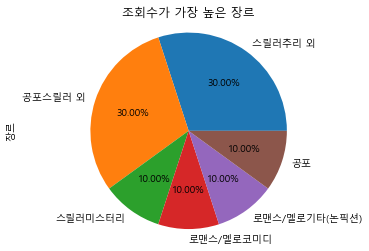

In [46]:
df1 = mvli1.장르.value_counts()
df1.plot.pie(autopct='%.2f%%')
plt.title("조회수가 가장 높은 장르")
plt.axis('equal')
plt.show()

In [23]:
mv1 = mvli.groupby('작가')[['장르']].sum()
mv2 = mv1.sort_values(by='장르', ascending=False).head(10)
mv2

,장르
작가,
근육맨,코미디
서커스,코미디
모성진,추리역사픽션(팩션) 외
문성제,추리미스터리 외
정진,추리미스터리 외
리앤제이,추리가족/성장/아동 외
천자,전쟁역사픽션(팩션) 외스릴러기타(복수)
홍강의,전쟁역사픽션(팩션) 외
지후,전쟁로맨스/멜로


In [66]:
mv3 = mvli.groupby(['작가'])[['사업화희망분야','장르']].count().sort_values(by='사업화희망분야', ascending=False).head(10)
mv3

,사업화희망분야,장르
작가,,
우아한슬픔,8,8
안교찬,7,7
이정관,7,7
구고,4,4
soku,2,2
김슬기,2,2
천자,2,2
송인유,2,2
김은주,2,2


In [78]:
a=mvli['사업화희망분야'].count()

In [83]:
tt = mvli.groupby(mvli['작가']).count()
# t2 = tt.sort_values(by=a, ascending=False).head()
tt

,Unnamed: 0,사업화희망분야,장르,제목,조회수
작가,,,,,
김미숙,1,1,1,1,1
김민수,1,1,1,1,1
벼리,1,1,1,1,1
송인유,1,1,1,1,1
양은실,1,1,1,1,1
유재영,1,1,1,1,1
이지원,1,1,1,1,1
조이,1,1,1,1,1
지후,1,1,1,1,1


In [70]:
mv3 = mvli.sort_values(by='사업화희망분야', ascending=False).groupby('작가').head(10)
mv3

TypeError: count() takes at least 1 argument (0 given)

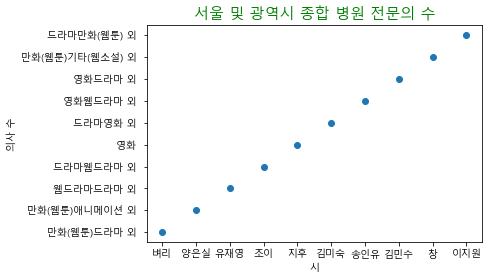

In [68]:
mvli=mvli.head(10)
x = mvli['작가']
y = mvli['사업화희망분야']
plt.xlabel('시')
plt.ylabel('의사 수')
plt.title('서울 및 광역시 종합 병원 전문의 수', color= 'green', fontsize=15)
plt.scatter(x,y)
plt.show()

In [ ]:
df3 = titanic.pclass.value_counts()
df3.plot.pie(autopct='%.2f%%')
plt.title("선실별 승객 수 비율")
plt.axis('equal')
plt.show()

In [ ]:
mv1.sort_values

In [31]:
mvli['장르'].count()

100

In [ ]:
x = doct['지역']
y = doct['전문의 수']
plt.xlabel('시')
plt.ylabel('의사 수')
plt.title('서울 및 광역시 종합 병원 전문의 수', color= 'green', fontsize=15)
plt.scatter(x,y)
plt.show()